In [106]:
import numpy as np
import pandas as pd
import seaborn as sns
import hvplot.pandas
import matplotlib.pyplot as plt

# Load data and drop some outliers

In [107]:
data = pd.read_csv("half_cleaned.csv")

def filter_outlier(df,col_name):
    q_low = data[col_name].quantile(0.1)
    q_hi  = data[col_name].quantile(0.9)
    df_filtered = data[(data[col_name] < q_hi) & (data[col_name] > q_low)]
    return df_filtered

col_list=["Interest Rate","Open Account", "Revolving Balance", "Revolving Utilities" , "Total Accounts", "Total Received Interest"]

for name in col_list:
    data=filter_outlier(data,name)




# Grade/Subgrade vs Loan Status Plot

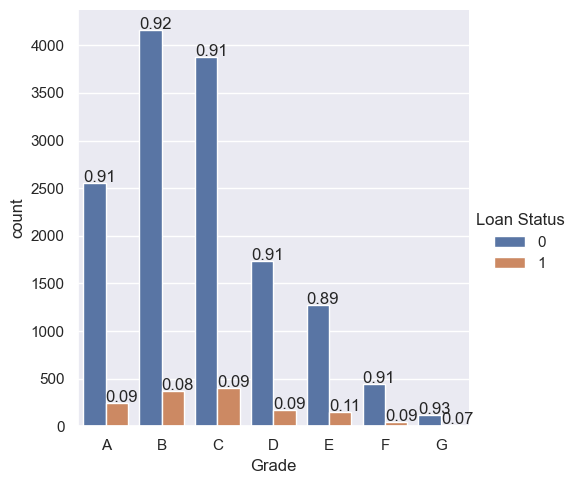

In [108]:
from itertools import product


hue_order = [0,1]
temp_grade_data = data["Grade"]
grade_order = sorted(temp_grade_data.unique().tolist())
grade_plot = sns.catplot(x='Grade', kind='count',data=data, hue='Loan Status', hue_order=hue_order, order=grade_order)
bar_order = product(grade_order, hue_order)
sorted_patches = sorted(grade_plot.ax.patches,key=lambda tup:tup.get_x())

spots = zip(sorted_patches, bar_order)

for spot in spots:
    class_total = len(data[data['Grade']==spot[1][0]])
    class_who_total = len(data[(data['Grade']==spot[1][0]) & 
        (data['Loan Status']==spot[1][1])])
    result = class_who_total/class_total
    height = spot[0].get_height() 
    length = spot[0].get_x()
    grade_plot.ax.text(length,height+10, '{:1.2f}'.format(result))




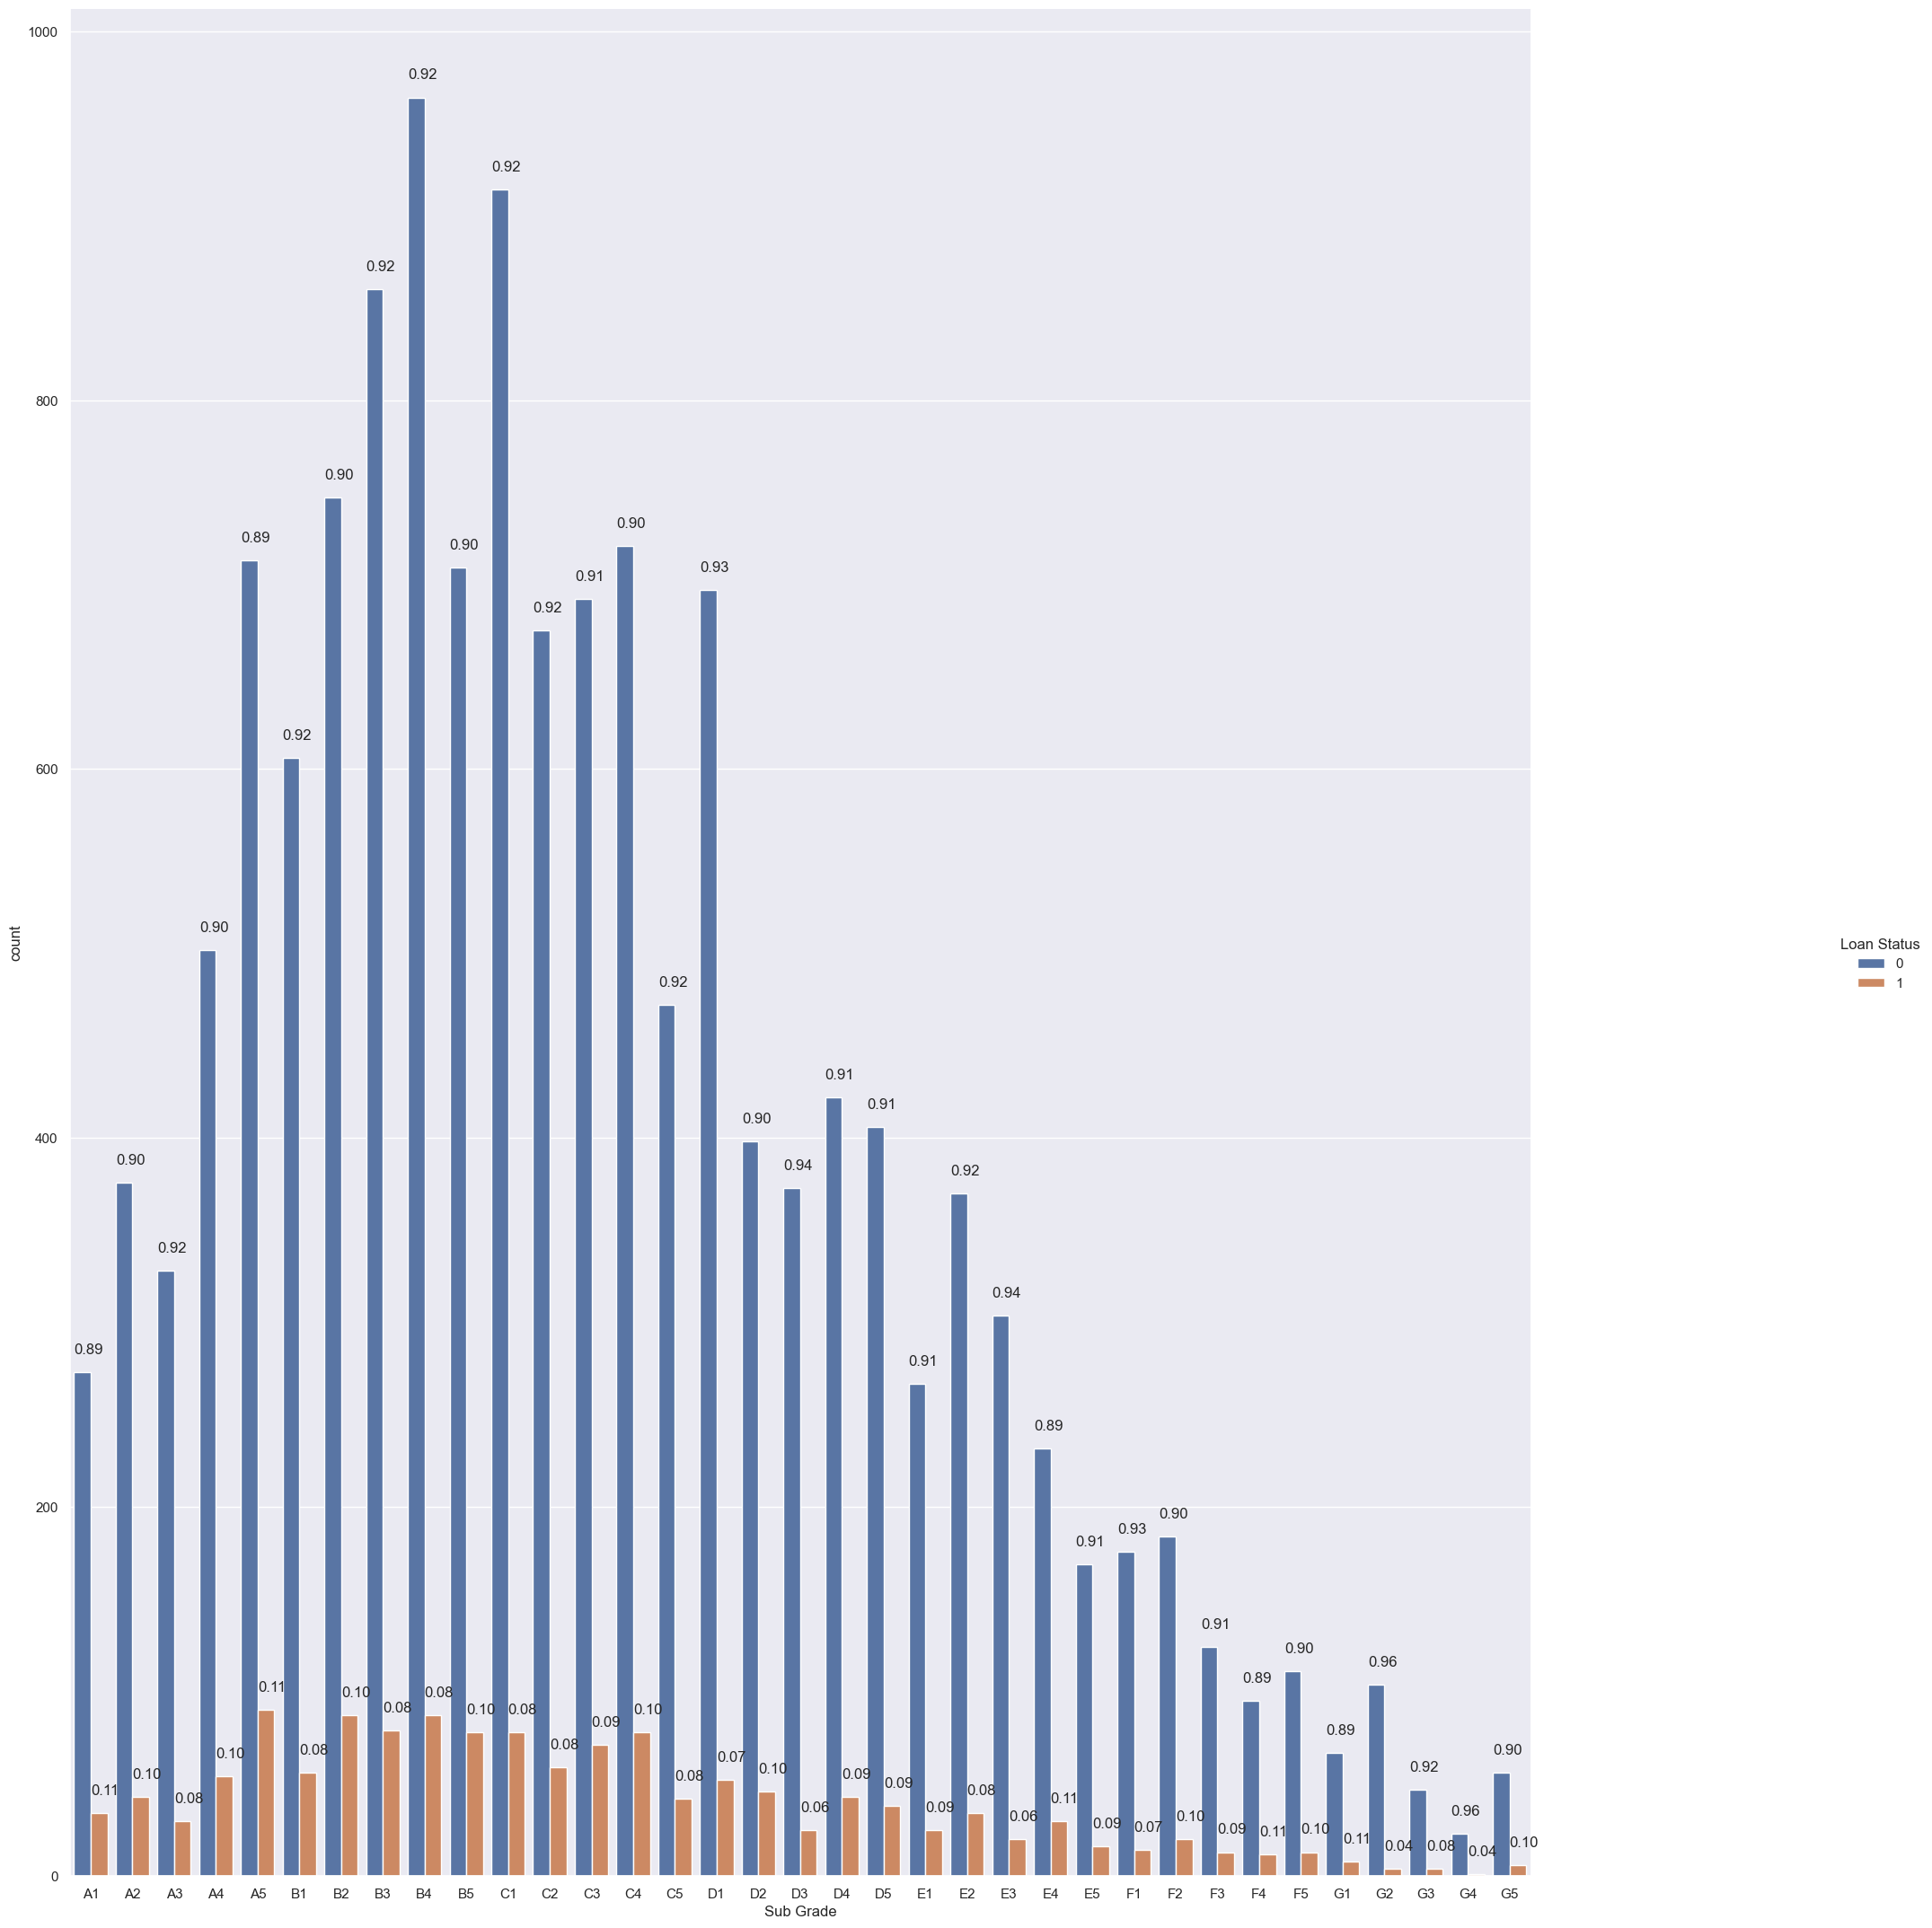

In [109]:
sns.set(rc={'figure.figsize':(50,40)})
temp_grade_data = data["Sub Grade"]
grade_order = sorted(temp_grade_data.unique().tolist())
grade_plot = sns.catplot(x='Sub Grade', kind='count',data=data, hue='Loan Status', hue_order=hue_order, order=grade_order)
bar_order = product(grade_order, hue_order)
sorted_patches = sorted(grade_plot.ax.patches,key=lambda tup:tup.get_x())

spots = zip(sorted_patches, bar_order)

for spot in spots:
    class_total = len(data[data['Sub Grade']==spot[1][0]])
    class_who_total = len(data[(data['Sub Grade']==spot[1][0]) & 
        (data['Loan Status']==spot[1][1])])
    result = class_who_total/class_total
    height = spot[0].get_height() 
    length = spot[0].get_x()
    grade_plot.ax.text(length,height+10, '{:1.2f}'.format(result))
grade_plot.fig.set_size_inches(25,25)

# Transform sub grade into dummy variables

In [110]:
dummy1=pd.get_dummies(data["Sub Grade"])
dummy2=pd.get_dummies(data["Grade"])
output=data["Loan Status"]
data_drop=data.drop(columns=['Sub Grade', 'Grade', 'Loan Title','Loan Status'])
data_nograde=data.drop(columns=['Sub Grade', 'Grade','Unknown Variable', 'Loan Title'])
data_nograde.to_csv("data_nograde.csv", index=False)
dummy_subgrade_data=pd.concat([data_drop,dummy1,output], axis=1)
dummy_grade_data=pd.concat([data_drop,dummy2,output], axis=1)

dummy_allgrades_data=pd.concat([data_drop,dummy1,dummy2,output], axis=1)







## Save to CSV file

In [111]:
dummy_subgrade_data.to_csv("dummy_subgrade_data.csv", index=False)
dummy_grade_data.to_csv("dummy_grade_data.csv", index=False)
dummy_allgrades_data.to_csv("dummy_allgrades_data.csv", index=False)



# Test Correlation

/var/folders/cc/8jgll2f15dl0ydv9t49l2ylw0000gn/T/ipykernel_24121/3837639272.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_for_corr.corr(), vmin=-1, vmax=1,annot=True, cmap='twilight')


<AxesSubplot: >

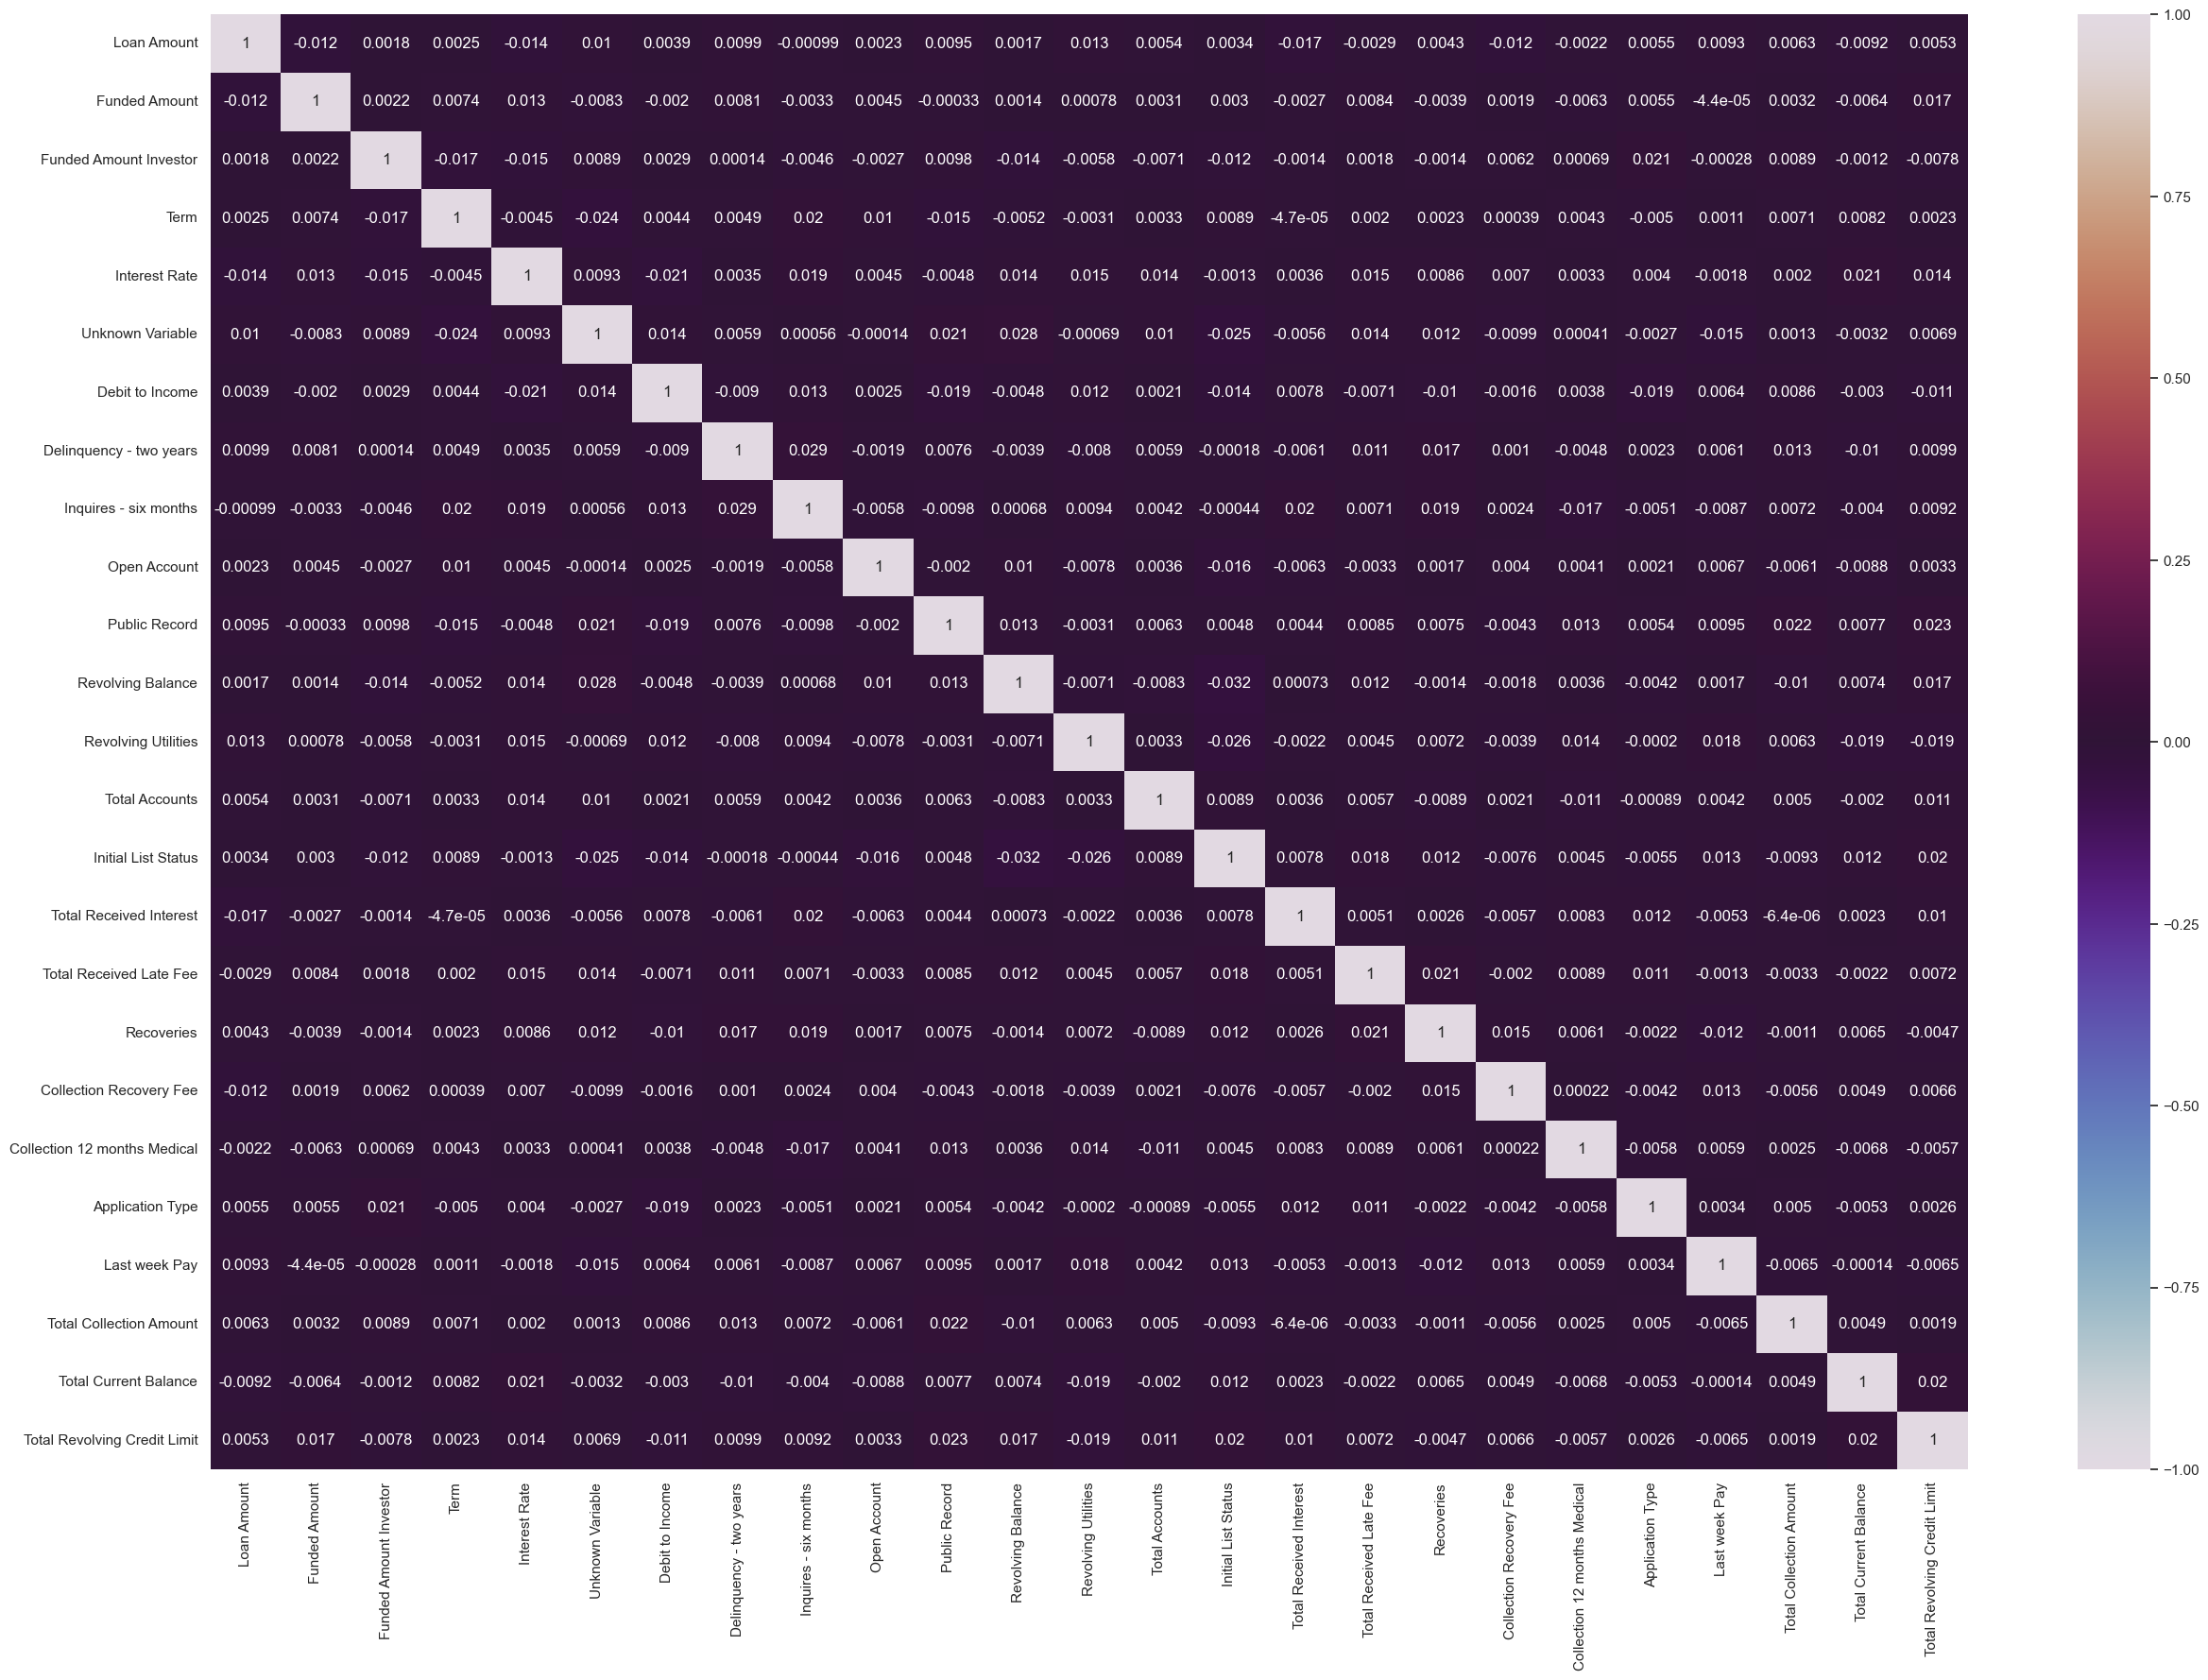

In [112]:
plt.figure(figsize=(30, 20))
#print(data.columns)

data_for_corr=data.drop(columns=data.columns[-7:])
sns.heatmap(data_for_corr.corr(), vmin=-1, vmax=1,annot=True, cmap='twilight')


# Loan Status Distribution

In [113]:
countplot_data = data["Loan Status"]
print("Default Status:", sum(countplot_data)/len(countplot_data))
print("Non-default Status:", (len(countplot_data)-sum(countplot_data))/len(countplot_data))


Default Status: 0.08929144986188732
Non-default Status: 0.9107085501381127
